# Explore here

Importar:

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pickle

Cargar datos: 

In [45]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv"
data = pd.read_csv(url)

# Solo nos interesan estas columnas
data = data[["Latitude", "Longitude", "MedInc"]]

print("Primeras filas del dataset:")
print(data.head())
print(f"Dimensiones del dataset: {data.shape}")

Primeras filas del dataset:
   Latitude  Longitude  MedInc
0     37.88    -122.23  8.3252
1     37.86    -122.22  8.3014
2     37.85    -122.24  7.2574
3     37.85    -122.25  5.6431
4     37.85    -122.25  3.8462
Dimensiones del dataset: (20640, 3)


Dividir en train y test:

In [46]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

Construir K-Means:

In [47]:
kmeans = KMeans(n_clusters=6, n_init="auto", random_state=42)
kmeans.fit(X_train)

# Guardamos los clusters en el dataset
X_train = X_train.copy()  # Evita warning de pandas
X_train["Cluster"] = kmeans.labels_

Visualizar clusters:

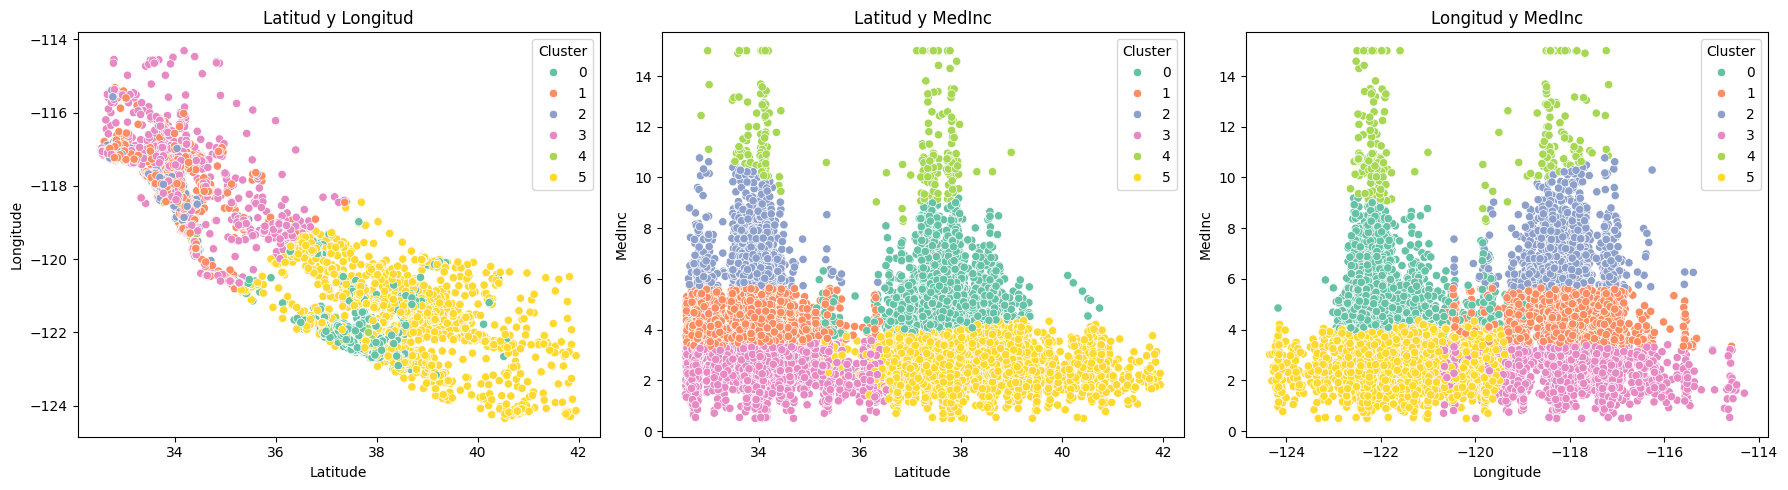

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.scatterplot(ax=axes[0], data=X_train, x="Latitude", y="Longitude", hue="Cluster", palette="Set2")
axes[0].set_title("Latitud y Longitud")

sns.scatterplot(ax=axes[1], data=X_train, x="Latitude", y="MedInc", hue="Cluster", palette="Set2")
axes[1].set_title("Latitud y MedInc")

sns.scatterplot(ax=axes[2], data=X_train, x="Longitude", y="MedInc", hue="Cluster", palette="Set2")
axes[2].set_title("Longitud y MedInc")

plt.tight_layout()
plt.show()

Gráfica 1 (Latitud vs Longitud):
Esta gráfica muestra la ubicación geográfica de las casas en California. Los colores representan los distintos clusters creados por el modelo K-Means. 
Se observa que algunos grupos se superponen porque las casas están físicamente cerca unas de otras.

Gráfica 2 (Latitud vs MedInc):
En esta gráfica se relaciona la latitud con el ingreso medio de las casas. 
Los clusters se ven mejor diferenciados, lo que indica que el nivel de ingresos ayuda a separar más claramente los grupos.

Gráfica 3 (Longitud vs MedInc):
Esta gráfica muestra la relación entre la longitud y el ingreso medio. 
Presenta un patrón similar al gráfico anterior y confirma que la combinación entre ubicación e ingresos permite una buena separación de los clusters.

Predecir clusters en test:

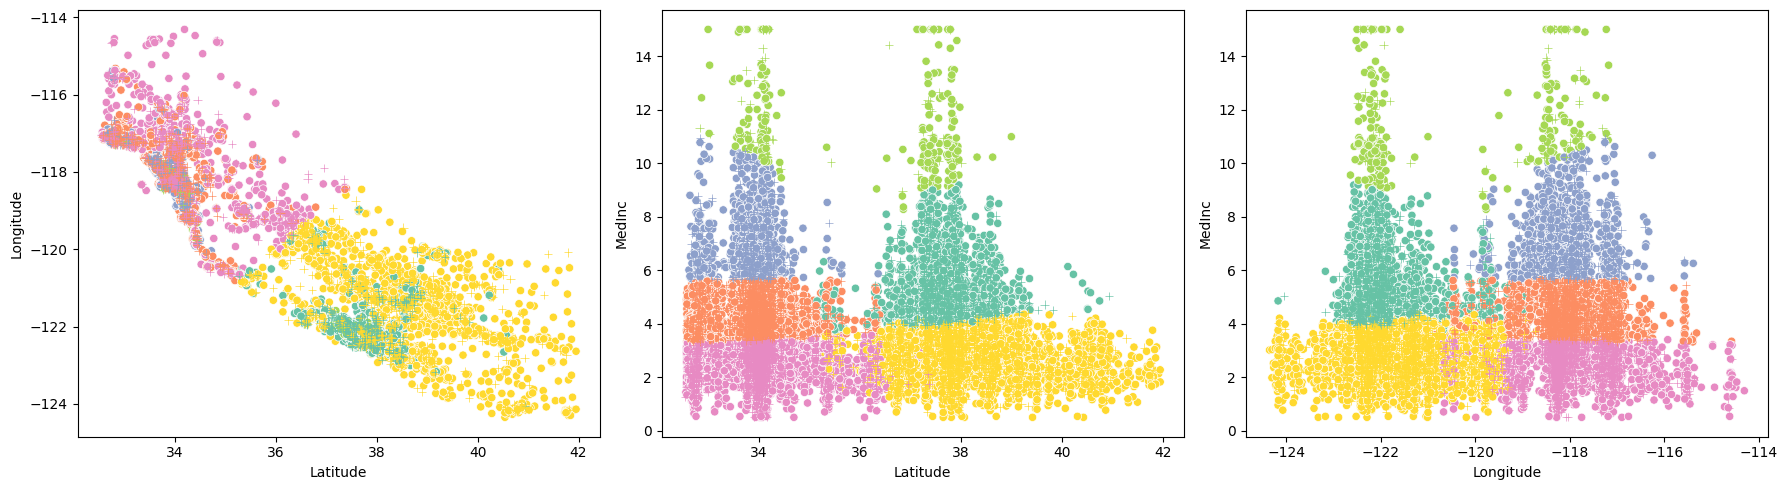

In [49]:
X_test = X_test.copy()
X_test["Cluster"] = kmeans.predict(X_test)

# Añadimos test al gráfico anterior
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for i, col in enumerate([("Latitude","Longitude"), ("Latitude","MedInc"), ("Longitude","MedInc")]):
    sns.scatterplot(ax=axes[i], data=X_train, x=col[0], y=col[1], hue="Cluster", palette="Set2")
    sns.scatterplot(ax=axes[i], data=X_test, x=col[0], y=col[1], hue="Cluster", palette="Set2", marker="+")
    axes[i].legend([],[], frameon=False)

plt.tight_layout()
plt.show()

la gráfica sirve para comprobar visualmente que el modelo K-Means asigna correctamente los datos nuevos a los clusters existentes, ya que los puntos de test siguen la misma distribución que los de entrenamiento.

Entrenar modelo:

Tomo esta decisión porque primero se usa K-Means para crear los grupos de forma automática y luego trato esos grupos como si fueran etiquetas reales. Asi el cluster pasa a ser lo que se quiere predecir y la latitud, la longitud y el ingreso medio son las variables de entrada. Uso un Decision Tree porque es fácil de interpretar y aprende reglas simples para clasificar las casas. Al evaluarlo con datos de test y obtener una precisión muy alta, comprobamos que los clusters creados por K-Means están bien definidos y pueden predecirse correctamente.

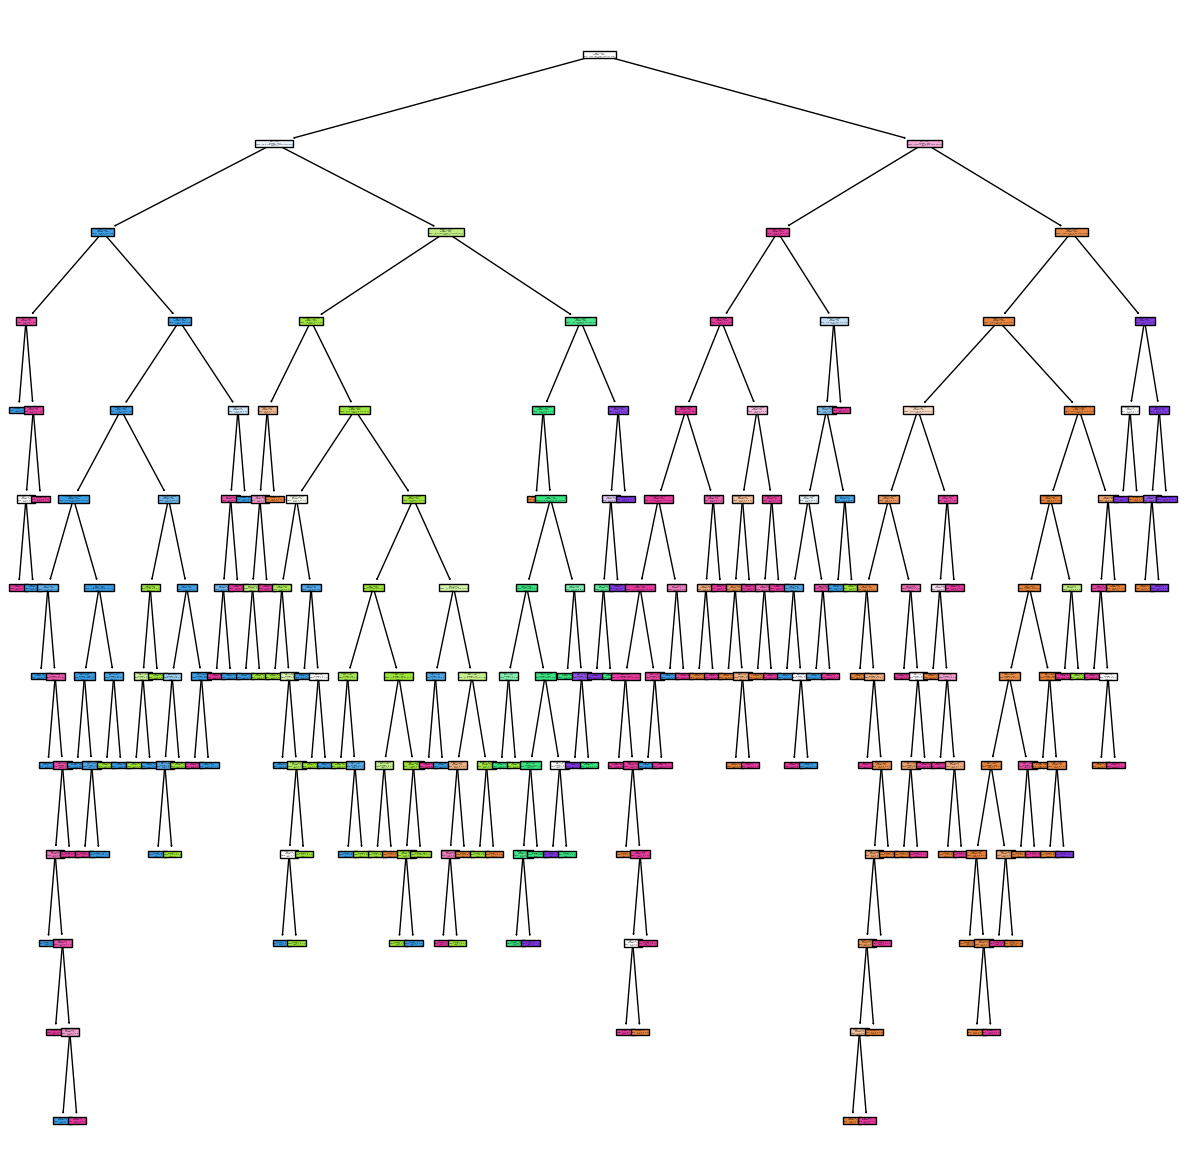

Accuracy del Decision Tree: 0.9941860465116279


In [50]:
y_train = X_train["Cluster"]
X_train_features = X_train.drop("Cluster", axis=1)

y_test = X_test["Cluster"]
X_test_features = X_test.drop("Cluster", axis=1)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_features, y_train)

# Visualizar árbol
plt.figure(figsize=(15,15))
plot_tree(dt_model, feature_names=X_train_features.columns, class_names=[str(i) for i in range(6)], filled=True)
plt.show()

# Evaluar precisión
y_pred = dt_model.predict(X_test_features)
print("Accuracy del Decision Tree:", accuracy_score(y_test, y_pred))

Ahora el arbol un poco mas sencillo:

In [51]:
dt_model = DecisionTreeClassifier(
    max_depth=3,        # limita la profundidad del árbol
    random_state=42
)

dt_model.fit(X_train_features, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

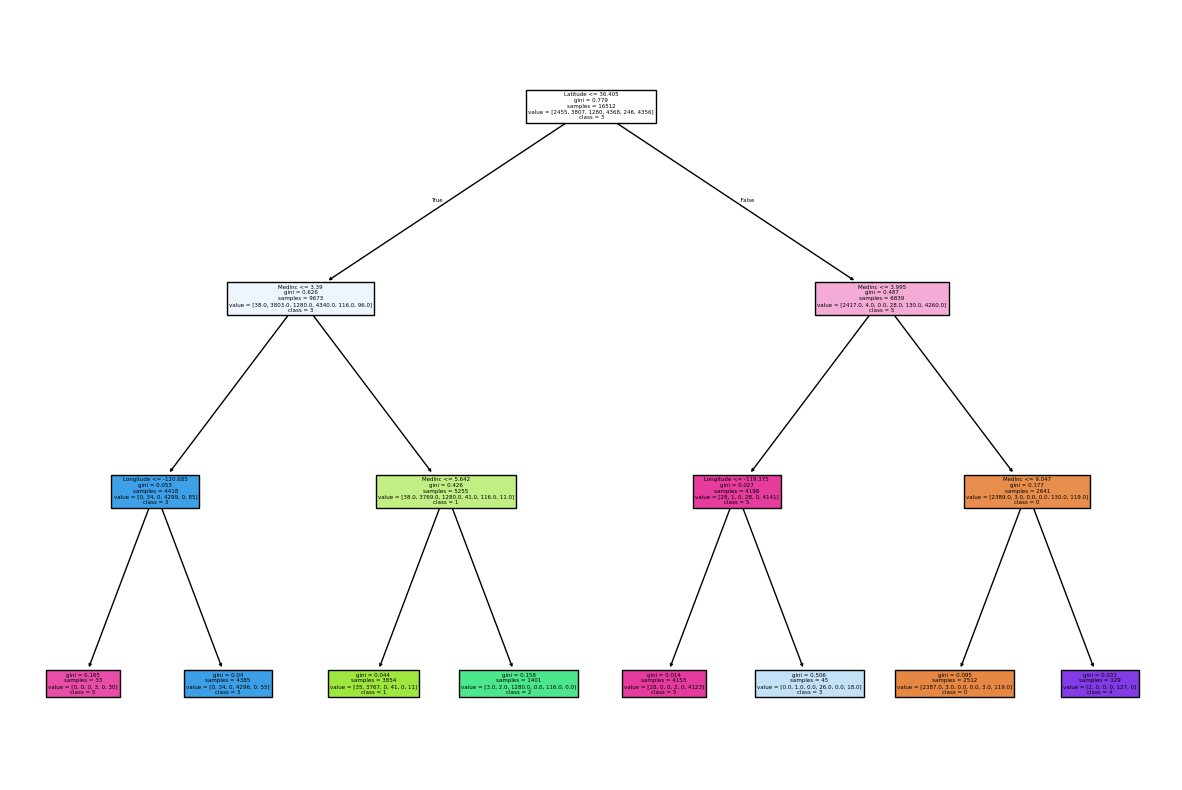

In [52]:
plt.figure(figsize=(15,10))
plot_tree(
    dt_model,
    feature_names=X_train_features.columns,
    class_names=[str(i) for i in range(6)],
    filled=True
)
plt.show()

Guardar modelos:

In [53]:
pickle.dump(kmeans, open("kmeans_model.pkl", "wb"))
pickle.dump(dt_model, open("decision_tree_model.pkl", "wb"))